### Oppgave 3d: Implementere Eulers metode

Løs Lane-Emden numerisk for n = 1, og sammenlign med den analytiske løsningen.

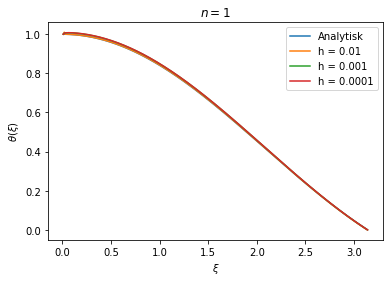

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def step_euler(y,t, h, f, n):
    ''' Performs one step of Euler's method. '''
    return y + h*f(y,t, n)

def full_euler(h, f, n, y_0 = 1, start_t = 0.01, end_t = 3):
    ''' Performs all steps in Euler's method'''
    t_list = np.zeros(1)
    y_list = np.zeros((1,2))
    t_list[0] = start_t
    y_list[0] = y_0
    i = 0
    while True:
        next_value = step_euler(y_list[i], t_list[i], h, f, n)
        if next_value[0] <= 0:
            break
        else: 
            t_list = np.append(t_list, t_list[i]+h)
            y_list = np.vstack((y_list, next_value))
            y_list[i+1] = next_value
            i+=1
    return t_list, y_list

def lane_emden_analytical(t):
    return np.sin(t)/t

def lane_emden(y, t, n):
    return np.array([y[1], -y[0]**(n)-2*y[1]/t])

#task 3d:
h1 = 0.01
h2 = 0.001
h3 = 0.0001
n = 1
t_list1, yh1 = full_euler(h1, lane_emden, n)
t_list2, yh2 = full_euler(h2, lane_emden, n)
t_list3, yh3 = full_euler(h3, lane_emden, n)
plt.plot(t_list1, lane_emden_analytical(t_list1), label="Analytisk")
plt.plot(t_list1, yh1[:,0], label="h = "+str(h1))
plt.plot(t_list2, yh2[:,0], label="h = "+str(h2))
plt.plot(t_list3, yh3[:,0], label="h = "+str(h3))
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.title(r'$n = 1$')
plt.legend()
plt.savefig("3d.pdf", bbox_inches='tight')
plt.show()

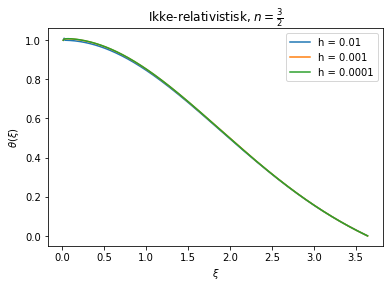

ξ_N = 3.6399999999999664 h1 = 0.01, n = 3/2
ξ_N²|θ'(ξ_N)|= 2.7303004917826343 h1 = 0.01, n = 3/2

ξ_N = 3.6439999999997097 h2 = 0.001, n = 3/2
ξ_N²|θ'(ξ_N)|= 2.7342188627408475 h2 = 0.001, n = 3/2

ξ_N = 3.644700000003267 h3 = 0.0001, n = 3/2
ξ_N²|θ'(ξ_N)|= 2.7346509968178383 h3 = 0.0001, n = 3/2


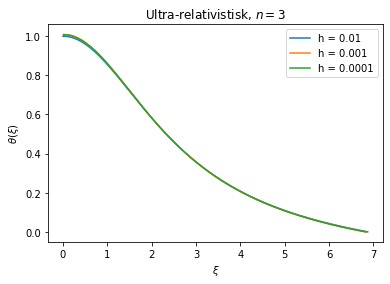

ξ_N = 6.869999999999898 h1 = 0.01, n = 3
ξ_N²|θ'(ξ_N)|= 2.0116904728124787 h1 = 0.01, n = 3

ξ_N = 6.832000000000616 h2 = 0.001, n = 3
ξ_N²|θ'(ξ_N)|= 2.017823414964884 h2 = 0.001, n = 3

ξ_N = 6.828299999997425 h3 = 0.0001, n = 3
ξ_N²|θ'(ξ_N)|= 2.0185025929619127 h3 = 0.0001, n = 3


In [4]:
#task 3e)
#Solved in relativistic and ultra-relativistic cases!
h1 = 0.01
h2 = 0.001
h3 = 0.0001
n1 = 3/2 #relativistic
n2 = 3 #ultrarelativistic
t_list1, yh1 = full_euler(h1, lane_emden, n1)
t_list2, yh2 = full_euler(h2, lane_emden, n1)
t_list3, yh3 = full_euler(h3, lane_emden, n1)
plt.plot(t_list1, yh1[:,0], label="h = "+str(h1))
plt.plot(t_list2, yh2[:,0], label="h = "+str(h2))
plt.plot(t_list3, yh3[:,0], label="h = "+str(h3))
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.title(r"Ikke-relativistisk, $n = \frac{3}{2}$")
plt.legend()
plt.savefig("3eRel.pdf", bbox_inches='tight')
plt.show()

print('ξ_N =',t_list1[-1], "h1 = 0.01, n = 3/2")
print("ξ_N²|θ'(ξ_N)|=", t_list1[-1]**2*np.abs((yh1[:,0][-1]-yh1[:,0][-2])/h1), "h1 = 0.01, n = 3/2")
print()
print('ξ_N =',t_list2[-1], "h2 = 0.001, n = 3/2")
print("ξ_N²|θ'(ξ_N)|=", t_list2[-1]**2*np.abs((yh2[:,0][-1]-yh2[:,0][-2])/h2), "h2 = 0.001, n = 3/2")
print()
print('ξ_N =',t_list3[-1], "h3 = 0.0001, n = 3/2")
print("ξ_N²|θ'(ξ_N)|=", t_list3[-1]**2*np.abs((yh3[:,0][-1]-yh3[:,0][-2])/h3), "h3 = 0.0001, n = 3/2")

t_list1Ultra, yh1Ultra = full_euler(h1, lane_emden, n2)
t_list2Ultra, yh2Ultra = full_euler(h2, lane_emden, n2)
t_list3Ultra, yh3Ultra = full_euler(h3, lane_emden, n2)
plt.plot(t_list1Ultra, yh1Ultra[:,0], label="h = "+str(h1))
plt.plot(t_list2Ultra, yh2Ultra[:,0], label="h = "+str(h2))
plt.plot(t_list3Ultra, yh3Ultra[:,0], label="h = "+str(h3))
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.title(r"Ultra-relativistisk, $n = 3$")
plt.legend()
plt.savefig("3eUltra.pdf", bbox_inches='tight')
plt.show()

print('ξ_N =',t_list1Ultra[-1], "h1 = 0.01, n = 3")
print("ξ_N²|θ'(ξ_N)|=", t_list1Ultra[-1]**2*np.abs((yh1Ultra[:,0][-1]-yh1Ultra[:,0][-2])/h1), "h1 = 0.01, n = 3")
print()
print('ξ_N =',t_list2Ultra[-1], "h2 = 0.001, n = 3")
print("ξ_N²|θ'(ξ_N)|=", t_list2Ultra[-1]**2*np.abs((yh2Ultra[:,0][-1]-yh2Ultra[:,0][-2])/h2), "h2 = 0.001, n = 3")
print()
print('ξ_N =',t_list3Ultra[-1], "h3 = 0.0001, n = 3")
print("ξ_N²|θ'(ξ_N)|=", t_list3Ultra[-1]**2*np.abs((yh3Ultra[:,0][-1]-yh3Ultra[:,0][-2])/h3), "h3 = 0.0001, n = 3")

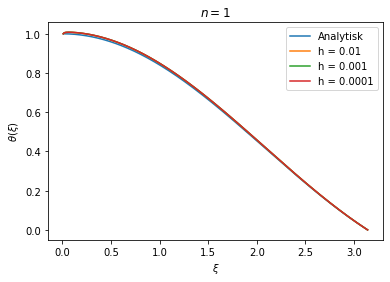

In [5]:
#task 3f)
#RK4

def step_RK4(y,t, h, f, n):
    ''' Calculates all k's and takes on RK4-step '''
    k1 = f(y,t, n)
    k2 = f(y + h*k1/2, t+h/2, n)
    k3 = f(y+h*k2/2, t+h/2, n)
    k4 = f(y+h*k3, t+h, n)
    return y + (h/6)*(k1+2*k2+2*k3+k4)

def full_RK4(h, f, n, y_0 = 1, start_t = 0.01, end_t = 3):
    ''' Performs all steps in RK4 for this problem '''
    #Could easily be combined with full_euler, since a lot of the code is the same. 
    #Make necessary adjustments for simplicity/readabiltiy once everything works as it should
    t_list = np.zeros(1)
    y_list = np.zeros((1,2))
    t_list[0] = start_t
    y_list[0] = y_0
    i = 0
    while True:
        next_value = step_RK4(y_list[i], t_list[i], h, f, n)
        if next_value[0] <= 0:
            break
        else: 
            t_list = np.append(t_list, t_list[i]+h)
            y_list = np.vstack((y_list, next_value))
            y_list[i+1] = next_value
            i+=1
    return t_list, y_list

#Should of course also make a plotting function at this point (in fact a long time ago)

#same as 3d when it comes to plotting etc
h1 = 0.01
h2 = 0.001
h3 = 0.0001
n = 1
t_list1Kutta, yh1Kutta = full_RK4(h1, lane_emden, n)
t_list2Kutta, yh2Kutta = full_RK4(h2, lane_emden, n)
t_list3Kutta, yh3Kutta = full_RK4(h3, lane_emden, n)
plt.plot(t_list1Kutta, lane_emden_analytical(t_list1Kutta), label="Analytisk")
plt.plot(t_list1Kutta, yh1Kutta[:,0], label="h = "+str(h1))
plt.plot(t_list2Kutta, yh2Kutta[:,0], label="h = "+str(h2))
plt.plot(t_list3Kutta, yh3Kutta[:,0], label="h = "+str(h3))
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.title(r'$n = 1$')
plt.legend()
#plt.savefig("3f.pdf", bbox_inches='tight')
plt.show()

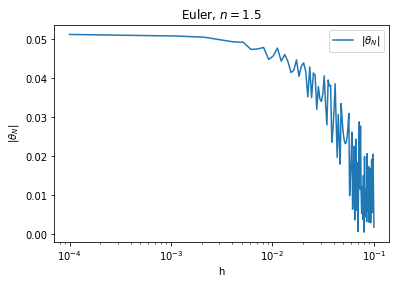

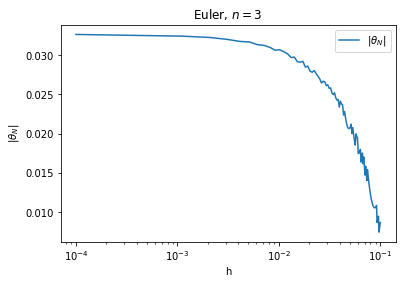

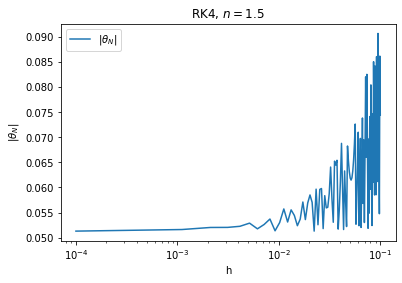

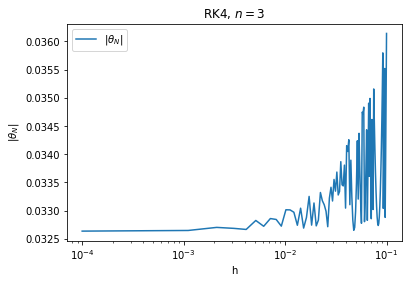

/home/ajo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


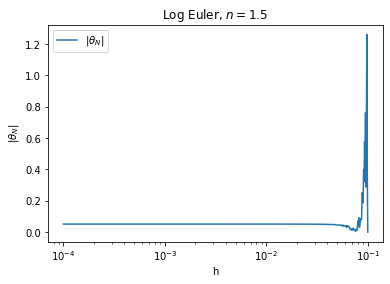

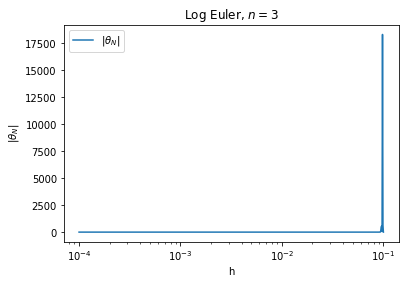

In [ ]:
#3g)
#Plot the global error from both methods as a function of h
#Need to find the solutions for continuous h-values for both RK4 and Euler.

def fixed_full_euler_or_RK4(h, f, n, method="euler", y_0 = 1, start_t = 0.01, end_t = 3):
    ''' Performs all steps in RK4 or Euler, this time all the way to end_t. '''
    N = int((end_t - start_t)/h) 
    t_list = np.linspace(start_t, end_t, N+1) 
    y_list = np.zeros((N+1,2))
    t_list[0] = start_t
    y_list[0] = y_0
    for i in range(N):
        if method == "euler":
            next_value = step_euler(y_list[i], t_list[i], h, f, n)
            if next_value[0] == 0:
                y_list[i+1] = 0
            else: 
                y_list[i+1] = next_value
        elif method == "RK4":
            next_value = step_RK4(y_list[i], t_list[i], h, f, n)
            if next_value[0] == 0:
                y_list[i+1] = 0
            else: 
                y_list[i+1] = next_value
    return t_list, y_list

def global_error(theta_list):
    ''' Finds global error of one theta, which depends on the h-value used to solve the equation '''
    return np.abs(theta_list[-1])
    #return np.full(len(h_values),np.abs(y_list[:,0][-1]))

def global_error_vs_h_values(h_values, f, n, method="euler", y_0 = 1, start_t = 0.01, end_t = 3):
    ''' 
    Takes y-list from method and h-values. 
    Returns numpy array of global_error that later may be plotted against h (in correct dimensions)
    '''
    global_error_list = np.zeros(len(h_values))
    for i in range(len(h_values)):
        t_list, y_list = fixed_full_euler_or_RK4(h_values[i], f, n, method, y_0, start_t, end_t)
        theta_list = y_list[:,0]
        global_error_list[i] = global_error(theta_list)
    return global_error_list
    
    
def cont_solutions(h_list, f, n, method="euler", y_0 = 1, start_t = 0.01, end_t = 3):
    
    ''' 
    Finds solutions for supplied method and returns y_lists and h_values
    '''
    list_of_t_lists = np.zeros(len(h_list))
    list_of_y_lists = np.zeros(len(h_list))
    for i in range(len(h_list)):
        if method == "euler":
            t_list, y_list = full_RK4(h_list[i], f, n, y_0, start_t, end_t)
        elif method == "RK4": 
            t_list, y_list = full_euler(h_list[i], f, n, y_0, start_t, end_t)
        print(i)
        list_of_t_lists[i] = t_list
        list_of_y_lists[i] = y_list
    return list_of_t_lists, list_of_y_lists
        

def plot_y_vs_h(y_list, h_values, title, label=r'$|\theta_N|$', xlabel=r'h', ylabel=r'$|\theta_N|$'):
    plt.plot(h_values, y_list, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale('log')
    plt.legend()
    plt.show()
    
    
h_values = np.linspace(1e-4,0.1, 100) #E.g. 
h_values_log = np.logspace(-4,0,100) #Try with log-scale too.
n = [3/2, 3]
ksiN = [3.65375, 6.89685]

global_errorsE1 = global_error_vs_h_values(h_values, lane_emden, n[0], "euler", 1, 1, ksiN[0])
global_errorsE2 = global_error_vs_h_values(h_values, lane_emden, n[1], "euler", 1, 0.1, ksiN[1])
plot_y_vs_h(global_errorsE1, h_values, r'Euler, $n='+str(n[0])+'$')
plot_y_vs_h(global_errorsE2, h_values, r'Euler, $n='+str(n[1])+'$')

global_errorsKutta1 = global_error_vs_h_values(h_values, lane_emden, n[0], "RK4", 1, 1, ksiN[0])
global_errorsKutta2 = global_error_vs_h_values(h_values, lane_emden, n[1], "RK4", 1, 0.1, ksiN[1])
plot_y_vs_h(global_errorsKutta1, h_values, r'RK4, $n='+str(n[0])+'$')
plot_y_vs_h(global_errorsKutta2, h_values, r'RK4, $n='+str(n[1])+'$')

global_errorsELog1 = global_error_vs_h_values(h_values_log, lane_emden, n[0], "euler", 1, 1, ksiN[0])
global_errorsELog2 = global_error_vs_h_values(h_values_log, lane_emden, n[1], "euler", 1, 1, ksiN[1])
plot_y_vs_h(global_errorsELog1, h_values, r'Log Euler, $n='+str(n[0])+'$')
plot_y_vs_h(global_errorsELog2, h_values, r'Log Euler, $n='+str(n[1])+'$')

global_errorsKuttaLog1 = global_error_vs_h_values(h_values_log, lane_emden, n[0], "RK4", 1, 1, ksiN[0])
global_errorsKuttaLog2 = global_error_vs_h_values(h_values_log, lane_emden, n[1], "RK4", 1, 1, ksiN[1])
plot_y_vs_h(global_errorsKuttaLog1, h_values, r'Log RK4, $n='+str(n[0])+'$')
plot_y_vs_h(global_errorsKuttaLog2, h_values, r'Log RK4, $n='+str(n[1])+'$')
